## This Jupyter Notebook was made by Mateo Bonnett for the Coursera Applied Data Science Capstone course offered by IBM

Import all necessary packages

In [106]:
import pandas as pd
import numpy as np
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans # import k-means from clustering stage
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

print('Libraries imported')

Libraries imported


Read the data from a csv file name "Madrid" into a pandas DataFrame (check the full report for more details)

In [107]:
df = pd.read_csv('Madrid.csv',sep=";")
df.head()

,Codigo de barrio,Codigo de distrito al que pertenece,Nombre de barrio,Latitude,Longitude
0,1,1,PALACIO,40.415000,-3.713333
1,1,2,IMPERIAL,40.406667,-3.716944
2,1,3,PACIFICO,40.404722,-3.675833
3,1,4,RECOLETOS,40.424167,-3.686389
4,1,5,EL VISO,40.444367,-3.688831


Change the name of the columns from spanish to english  
Create a new DataFrame named madrid containing these changes

In [108]:
madrid = df.copy()
madrid.columns = ["Neighborhood's code", "District's code","Neighborhood","Latitude","Longitude"]
madrid.head()

,Neighborhood's code,District's code,Neighborhood,Latitude,Longitude
0,1,1,PALACIO,40.415000,-3.713333
1,1,2,IMPERIAL,40.406667,-3.716944
2,1,3,PACIFICO,40.404722,-3.675833
3,1,4,RECOLETOS,40.424167,-3.686389
4,1,5,EL VISO,40.444367,-3.688831


Get the coordinates of Madrid using geopy

In [109]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


Create a map of Madrid using latitude and longitude values

In [111]:
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(madrid['Latitude'],madrid['Longitude'], madrid['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid

Lets simplify the map by selecting only the neighborhood in which our restaurant is located (Cortes) 
Let's slice the original dataframe and create a new dataframe of the neighborhood data.

In [112]:
cortes = madrid[madrid['Neighborhood']=='CORTES']
cortes

,Neighborhood's code,District's code,Neighborhood,Latitude,Longitude
42,3,1,CORTES,40.414167,-3.698056


Get the coordinates of Cortes using the cortes DataFrame

In [113]:
latitude_cor = cortes.iloc[0][3]
longitude_cor = cortes.iloc[0][4]
print('The geograpical coordinate of Cortes are,',str(latitude_cor), ",", str(longitude_cor))

The geograpical coordinate of Cortes are, 40.414167 , -3.698056


Get the coordinates of the restuaraunt and insert them into a DataFrame
The restaurant coordinates were obtained using Google Maps.

In [114]:
restaurant = pd.DataFrame(columns=['Restaurant','Neighborhood','Latitude','Longitude'])
restaurant.loc[0] = ['La Primera','CORTES',40.4191257,-3.6979501]

Create map of Madrid's neighborhood CORTES using its latitude and longitude values  
You can also check the location of the restaurant in the map

In [115]:
map_cortes = folium.Map(location=[latitude_cor, longitude_cor], zoom_start=15)

# add markers to map
for lat, lng, neighborhood in zip(cortes['Latitude'],cortes['Longitude'], cortes['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cortes)
    
for lat,lng, restaurant in zip(restaurant['Latitude'],restaurant['Longitude'], restaurant['Restaurant']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,).add_to(map_cortes)

    
map_cortes

Define Foursquare Credentials and Version

In [116]:
CLIENT_ID = 'R5DQP4WHPGDLHVMK3H22T5BUVVS4EXCGBBYB4TAZRQQWUF4V' 
CLIENT_SECRET = 'XF1WYAU2B0D2U3CEDSP4CT0Q2RBZCOKXZMCNSVHQ1EYZ1HAU'
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R5DQP4WHPGDLHVMK3H22T5BUVVS4EXCGBBYB4TAZRQQWUF4V
CLIENT_SECRET:XF1WYAU2B0D2U3CEDSP4CT0Q2RBZCOKXZMCNSVHQ1EYZ1HAU


Explore neighborhood data  
Get the top 100 venues that are in Cortes within a radius of 500 meters.

In [117]:
LIMIT = 100 
radius = 500 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_cor, 
    longitude_cor, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=R5DQP4WHPGDLHVMK3H22T5BUVVS4EXCGBBYB4TAZRQQWUF4V&client_secret=XF1WYAU2B0D2U3CEDSP4CT0Q2RBZCOKXZMCNSVHQ1EYZ1HAU&v=20180605&ll=40.414167,-3.698056&radius=500&limit=100'

In [118]:
#Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d46ee1ef8953d0025376fa3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Huertas',
  'headerFullLocation': 'Huertas, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 192,
  'suggestedBounds': {'ne': {'lat': 40.4186670045, 'lng': -3.692156693345532},
   'sw': {'lat': 40.4096669955, 'lng': -3.7039553066544677}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57756e14498e605edcad54fc',
       'name': 'Salmon Gurú',
       'location': {'address': 'C. Echegaray, 21',
        'lat': 40.41486660560401,
        'lng': -3.6995319613728506,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.41486660560401,
   

Define a function that extracts the category of the venue from the JSON text

In [119]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe.

In [120]:
venues = results['response']['groups'][0]['items']
    
cortes_nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
cortes_nearby_venues =cortes_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
cortes_nearby_venues['venue.categories'] = cortes_nearby_venues.apply(get_category_type, axis=1)

# clean columns
cortes_nearby_venues.columns = [col.split(".")[-1] for col in cortes_nearby_venues.columns]

cortes_nearby_venues.head()

,name,categories,lat,lng
0,Salmon Gurú,Cocktail Bar,40.414867,-3.699532
1,La Cabaña Argentina,Argentinian Restaurant,40.415696,-3.698974
2,Fogg Birra and Cheese,Pub,40.412275,-3.697988
3,Alimentación Quiroga,Grocery Store,40.413760,-3.699457
4,El Inti de Oro,Peruvian Restaurant,40.415751,-3.698969


Plot the number of appearances for each venue in the cortes_nearby_venues DataFrame 

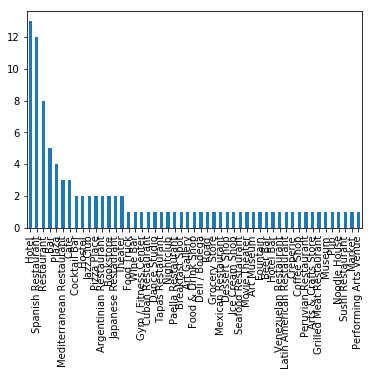

In [121]:
cortes_nearby_venues['categories'].value_counts().plot(kind='bar')

Get all the CENTRO district data into one DataFrame

In [122]:
centro = madrid[madrid["District's code"]==1]
centro

,Neighborhood's code,District's code,Neighborhood,Latitude,Longitude
0,1,1,PALACIO,40.415000,-3.713333
21,2,1,EMBAJADORES,40.408889,-3.699722
42,3,1,CORTES,40.414167,-3.698056
63,4,1,JUSTICIA,40.423889,-3.696389
83,5,1,UNIVERSIDAD,40.425278,-3.708333
102,6,1,SOL,40.416667,-3.703889


The following function will help us get all venues in the Centro district

In [123]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create and have a glance at the DataFrame containging the CENTRO district venues, previously retrieved from the Foursquare API

In [124]:
centro_venues = getNearbyVenues(names=centro['Neighborhood'],
                                   latitudes=centro['Latitude'],
                                   longitudes=centro['Longitude']
                                  )

PALACIO
EMBAJADORES
CORTES
JUSTICIA
UNIVERSIDAD
SOL


In [125]:
print(centro_venues.shape)
centro_venues.head()

(600, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PALACIO,40.415,-3.713333,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,PALACIO,40.415,-3.713333,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
2,PALACIO,40.415,-3.713333,Mercado Jamón Iberico,40.415309,-3.711633,Market
3,PALACIO,40.415,-3.713333,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
4,PALACIO,40.415,-3.713333,Plaza de La Almudena,40.416320,-3.713777,Plaza


In [126]:
centro_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
CORTES,100,100,100,100,100,100
EMBAJADORES,100,100,100,100,100,100
JUSTICIA,100,100,100,100,100,100
PALACIO,100,100,100,100,100,100
SOL,100,100,100,100,100,100
UNIVERSIDAD,100,100,100,100,100,100


Find the number of unique categories in the centro_venues DataFrame

In [127]:
print('There are {} uniques categories.'.format(len(centro_venues['Venue Category'].unique())))

There are 136 uniques categories.


In [128]:
# one hot encoding
centro_onehot = pd.get_dummies(centro_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
centro_onehot['Neighborhood'] = centro_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [centro_onehot.columns[-1]] + list(centro_onehot.columns[:-1])
centro_onehot = centro_onehot[fixed_columns]

centro_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,PALACIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PALACIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PALACIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PALACIO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,PALACIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
centro_onehot.shape

(600, 137)

In [130]:
#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
centro_grouped = centro_onehot.groupby('Neighborhood').mean().reset_index()
centro_grouped

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,CORTES,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.01,...,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00
1,EMBAJADORES,0.00,0.00,0.01,0.00,0.00,0.01,0.03,0.02,0.00,...,0.07,0.00,0.00,0.03,0.00,0.01,0.01,0.01,0.00,0.00
2,JUSTICIA,0.00,0.01,0.00,0.03,0.00,0.01,0.01,0.00,0.01,...,0.03,0.01,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.01
3,PALACIO,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.16,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.01,0.00
4,SOL,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.00,...,0.06,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
5,UNIVERSIDAD,0.00,0.00,0.00,0.01,0.00,0.03,0.01,0.01,0.00,...,0.04,0.01,0.00,0.04,0.01,0.01,0.00,0.00,0.00,0.00


In [131]:
centro_grouped.shape

(6, 137)

In [132]:
#Print top 5 venues per neighborhood
num_top_venues = 5

for hood in centro_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = centro_grouped[centro_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----CORTES----
                venue  freq
0               Hotel  0.13
1  Spanish Restaurant  0.12
2          Restaurant  0.08
3                 Bar  0.05
4               Plaza  0.04


----EMBAJADORES----
                venue  freq
0                 Bar  0.11
1    Tapas Restaurant  0.07
2          Restaurant  0.06
3                Café  0.06
4  Spanish Restaurant  0.05


----JUSTICIA----
                venue  freq
0              Bakery  0.07
1          Restaurant  0.06
2             Gay Bar  0.05
3               Hotel  0.04
4  Italian Restaurant  0.04


----PALACIO----
                venue  freq
0    Tapas Restaurant  0.16
1  Spanish Restaurant  0.12
2               Plaza  0.07
3          Restaurant  0.06
4                 Bar  0.04


----SOL----
                venue  freq
0  Spanish Restaurant  0.09
1               Hotel  0.07
2    Tapas Restaurant  0.06
3          Restaurant  0.05
4               Plaza  0.05


----UNIVERSIDAD----
                venue  freq
0                 Bar 

In [133]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [144]:
#Create a new dataframe to display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = centro_grouped['Neighborhood']

for ind in np.arange(centro_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(centro_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CORTES,Hotel,Spanish Restaurant,Restaurant,Bar,Plaza,Café,Mediterranean Restaurant,Bookstore,Pizza Place,Cocktail Bar
1,EMBAJADORES,Bar,Tapas Restaurant,Restaurant,Café,Spanish Restaurant,Coffee Shop,Hotel,Market,Plaza,Art Gallery
2,JUSTICIA,Bakery,Restaurant,Gay Bar,Italian Restaurant,Spanish Restaurant,Cocktail Bar,Hotel,Bookstore,Bar,Deli / Bodega
3,PALACIO,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Bar,Ice Cream Shop,Church,Mediterranean Restaurant,Gastropub,Historic Site
4,SOL,Spanish Restaurant,Hotel,Tapas Restaurant,Restaurant,Plaza,Gourmet Shop,Ice Cream Shop,Bistro,Bookstore,Hostel


In [145]:
# set number of clusters
kclusters = 4

centro_grouped_clustering = centro_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(centro_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 3, 2, 0, 1], dtype=int32)

In [146]:
#Create a new DataFrame that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

centro_merged = centro

centro_merged = centro_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [147]:
centro_merged

,Neighborhood's code,District's code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1,PALACIO,40.415000,-3.713333,2,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Bar,Ice Cream Shop,Church,Mediterranean Restaurant,Gastropub,Historic Site
21,2,1,EMBAJADORES,40.408889,-3.699722,1,Bar,Tapas Restaurant,Restaurant,Café,Spanish Restaurant,Coffee Shop,Hotel,Market,Plaza,Art Gallery
42,3,1,CORTES,40.414167,-3.698056,0,Hotel,Spanish Restaurant,Restaurant,Bar,Plaza,Café,Mediterranean Restaurant,Bookstore,Pizza Place,Cocktail Bar
63,4,1,JUSTICIA,40.423889,-3.696389,3,Bakery,Restaurant,Gay Bar,Italian Restaurant,Spanish Restaurant,Cocktail Bar,Hotel,Bookstore,Bar,Deli / Bodega
83,5,1,UNIVERSIDAD,40.425278,-3.708333,1,Bar,Hotel,Café,Bookstore,Plaza,Coffee Shop,Cocktail Bar,Theater,Tapas Restaurant,Spanish Restaurant
102,6,1,SOL,40.416667,-3.703889,0,Spanish Restaurant,Hotel,Tapas Restaurant,Restaurant,Plaza,Gourmet Shop,Ice Cream Shop,Bistro,Bookstore,Hostel


In [148]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(centro_merged['Latitude'], centro_merged['Longitude'], centro_merged['Neighborhood'], centro_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

After checking which neighborhoods are similar in the Centro district of Madrid, let´s compare them to the neighborhoods in downtown Toronto to check how they relate to each other.

In [61]:
downtown_venues = pd.read_excel('Downtown.xlsx')
downtown_venues.drop('Unnamed: 0', axis=1,inplace=True)
downtown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Mooredale House,43.678631,-79.380091,Building
1,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
2,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
3,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
4,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail


In [60]:
complete_venues = centro_venues.append(downtown_venues)
print(complete_venues.shape)
complete_venues.head(10)

(1883, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PALACIO,40.415,-3.713333,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,PALACIO,40.415,-3.713333,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
2,PALACIO,40.415,-3.713333,Mercado Jamón Iberico,40.415309,-3.711633,Market
3,PALACIO,40.415,-3.713333,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
4,PALACIO,40.415,-3.713333,Plaza de La Almudena,40.416320,-3.713777,Plaza
5,PALACIO,40.415,-3.713333,La Tapería Mayor,40.415438,-3.711253,Paella Restaurant
6,PALACIO,40.415,-3.713333,Plaza de la Villa,40.415409,-3.710391,Historic Site
7,PALACIO,40.415,-3.713333,Charlie Champagne,40.413936,-3.712647,Restaurant
8,PALACIO,40.415,-3.713333,Plaza de Ramales,40.417037,-3.711626,Plaza
9,PALACIO,40.415,-3.713333,Zuccaru,40.417179,-3.711674,Ice Cream Shop


In [62]:
complete_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",16,16,16,16,16,16
CORTES,100,100,100,100,100,100
"Cabbagetown,St. James Town",45,45,45,45,45,45
Central Bay Street,83,83,83,83,83,83
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16
Church and Wellesley,84,84,84,84,84,84


Check for unique categories in the data

In [63]:
print('There are {} uniques categories.'.format(len(complete_venues['Venue Category'].unique())))

There are 243 uniques categories.


In [64]:
# one hot encoding
complete_onehot = pd.get_dummies(complete_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
complete_onehot['Neighborhood'] = complete_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [complete_onehot.columns[-1]] + list(complete_onehot.columns[:-1])
complete_onehot = complete_onehot[fixed_columns]

complete_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
complete_onehot.shape

(1883, 243)

In [66]:
#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
complete_grouped = complete_onehot.groupby('Neighborhood').mean().reset_index()
complete_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.010000,0.00,0.000000,0.000000,0.010000,0.00,0.000000
1,Berczy Park,0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.017544,0.00,0.000000,0.000000,0.000000,0.00,0.000000
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.00,0.00,0.000000,0.00,0.0625,0.0625,0.0625,0.125,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
3,CORTES,0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.000000,0.01,0.000000,0.000000,0.010000,0.00,0.000000
4,"Cabbagetown,St. James Town",0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
5,Central Bay Street,0.012048,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.012048,0.00,0.000000,0.000000,0.012048,0.00,0.000000
6,"Chinatown,Grange Park,Kensington Market",0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.060000,0.00,0.000000,0.040000,0.010000,0.00,0.000000
7,Christie,0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
8,Church and Wellesley,0.011905,0.00,0.00,0.011905,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.000000,0.00,0.011905,0.011905,0.000000,0.00,0.011905
9,"Commerce Court,Victoria Hotel",0.000000,0.00,0.00,0.000000,0.00,0.0000,0.0000,0.0000,0.000,...,0.00,0.0,0.00,0.020000,0.00,0.000000,0.000000,0.010000,0.00,0.000000


In [67]:
complete_grouped.shape

(24, 243)

In [68]:
#Print top 5 venues per neighborhood
num_top_venues = 5

for hood in complete_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = complete_grouped[complete_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2       Steakhouse  0.04
3              Bar  0.04
4  Thai Restaurant  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.11
1        Bakery  0.05
2  Cocktail Bar  0.05
3    Steakhouse  0.04
4   Cheese Shop  0.04


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3          Boutique  0.06
4               Bar  0.06


----CORTES----
                venue  freq
0               Hotel  0.13
1  Spanish Restaurant  0.12
2          Restaurant  0.08
3                 Bar  0.05
4               Plaza  0.04


----Cabbagetown,St. James Town----
                venue  freq
0         Coffee Shop  0.09
1          Restaurant  0.07
2                 Pub  0.04
3  Italian Restaurant  0.04
4                Café  0.04


----Ce

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
#Create a new dataframe to display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
complete_venues_sorted = pd.DataFrame(columns=columns)
complete_venues_sorted['Neighborhood'] = complete_grouped['Neighborhood']

for ind in np.arange(complete_grouped.shape[0]):
    complete_venues_sorted.iloc[ind, 1:] = return_most_common_venues(complete_grouped.iloc[ind, :], num_top_venues)

complete_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Hotel,American Restaurant,Restaurant,Breakfast Spot,Asian Restaurant
1,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Cheese Shop,Steakhouse,Farmers Market,Beer Bar,Café,Seafood Restaurant,Greek Restaurant
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Terminal,Airport Lounge,Airport Food Court,Boat or Ferry,Bar,Airport Gate,Harbor / Marina,Airport,Coffee Shop
3,CORTES,Hotel,Spanish Restaurant,Restaurant,Bar,Plaza,Café,Mediterranean Restaurant,Theater,Hostel,Argentinian Restaurant
4,"Cabbagetown,St. James Town",Coffee Shop,Restaurant,Italian Restaurant,Bakery,Pizza Place,Café,Pub,Dive Bar,Bank,Jewelry Store


In [74]:
downtown_data = pd.read_excel('Toronto_Data.xlsx')
downtown_data.drop('Unnamed: 0',axis=1,inplace=True)
downtown_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


In [73]:
centro.columns=downtown_data.columns
centro

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,1,1,PALACIO,40.415000,-3.713333
21,2,1,EMBAJADORES,40.408889,-3.699722
42,3,1,CORTES,40.414167,-3.698056
63,4,1,JUSTICIA,40.423889,-3.696389
83,5,1,UNIVERSIDAD,40.425278,-3.708333
102,6,1,SOL,40.416667,-3.703889


In [76]:
complete_data1 = centro.append(downtown_data)
complete_data1.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,1,1,PALACIO,40.415000,-3.713333
21,2,1,EMBAJADORES,40.408889,-3.699722
42,3,1,CORTES,40.414167,-3.698056
63,4,1,JUSTICIA,40.423889,-3.696389
83,5,1,UNIVERSIDAD,40.425278,-3.708333


In [88]:
# set number of clusters
kclusters = 7

complete_grouped_clustering = complete_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(complete_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 3, 0, 1, 1, 5, 4, 1, 1], dtype=int32)

In [89]:
#Create a new DataFrame that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels

complete_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
complete_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

complete_merged = complete_data1

complete_merged = complete_merged.join(complete_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

complete_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1,PALACIO,40.415000,-3.713333,0,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Bar,Church,Gastropub,Ice Cream Shop,Mediterranean Restaurant,Vegetarian / Vegan Restaurant
21,2,1,EMBAJADORES,40.408889,-3.699722,6,Bar,Tapas Restaurant,Café,Restaurant,Spanish Restaurant,Coffee Shop,Hotel,Theater,Plaza,Pizza Place
42,3,1,CORTES,40.414167,-3.698056,0,Hotel,Spanish Restaurant,Restaurant,Bar,Plaza,Café,Mediterranean Restaurant,Theater,Hostel,Argentinian Restaurant
63,4,1,JUSTICIA,40.423889,-3.696389,6,Bakery,Restaurant,Gay Bar,Spanish Restaurant,Hotel,Italian Restaurant,Cocktail Bar,Sandwich Place,Tapas Restaurant,Bookstore
83,5,1,UNIVERSIDAD,40.425278,-3.708333,6,Bar,Hotel,Café,Theater,Cocktail Bar,Bookstore,Spanish Restaurant,Tapas Restaurant,Coffee Shop,Plaza


In [90]:
complete_merged.shape

(24, 16)

In [91]:
# Create map
map_clusters = folium.Map(location=[30, -20], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
cont = 0
for lat, lon, poi, cluster in zip(complete_merged['Latitude'], complete_merged['Longitude'], complete_merged['Neighborhood'], complete_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    if cont<1500:
        cont = cont +1
    else:
        break
            
map_clusters

In [92]:
complete_merged.loc[complete_merged['Cluster Labels'] == 0, complete_merged.columns[[2] + list(range(5, complete_merged.shape[1]))]]



,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,0,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Bar,Church,Gastropub,Ice Cream Shop,Mediterranean Restaurant,Vegetarian / Vegan Restaurant
42,CORTES,0,Hotel,Spanish Restaurant,Restaurant,Bar,Plaza,Café,Mediterranean Restaurant,Theater,Hostel,Argentinian Restaurant
102,SOL,0,Spanish Restaurant,Hotel,Tapas Restaurant,Restaurant,Plaza,Bistro,Hostel,Bookstore,Gourmet Shop,Ice Cream Shop
